In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [3]:
df_loneliness_sub = pd.read_csv("clean-data/loneliness_sub_clean_0921.csv")
df_lonely_sub = pd.read_csv("clean-data/lonely_sub_clean_0921.csv")
df_fa_sub = pd.read_csv("clean-data/ForeverAlone_sub_clean_0921.csv")
df_isolation_sub = pd.read_csv("clean-data/isolation_sub_clean_0921.csv")

df_loneliness_com = pd.read_csv("clean-data/loneliness_com_clean_0921.csv")
df_lonely_com = pd.read_csv("clean-data/lonely_com_clean_0921.csv")
df_fa_com = pd.read_csv("clean-data/ForeverAlone_com_clean_0921.csv")
df_isolation_com = pd.read_csv("clean-data/isolation_com_clean_0921.csv")

/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/carolcheng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_lonely_com=df_lonely_com[df_lonely_com['created_utc'] != "True"]

In [5]:
name_lst = ["lonely", "loneliness", "ForeverAlone", "isolation"]
sub_lst = [df_lonely_sub, df_loneliness_sub, df_fa_sub, df_isolation_sub]
com_lst = [df_lonely_com, df_loneliness_com, df_fa_com, df_isolation_com]

## sub, com by year

In [6]:
def getIntegerUTC(row):
    return int(float(row))

def getTimeStamp(row):
     return datetime.datetime.fromtimestamp(row)
    
def getYear(row):
     return row.year

def getMonth(row):
     return row.month
    
def getDelta(df, author_col, time_col='created_utc'):
    df['date']=df[time_col].apply(getTimeStamp)
    gb = df.groupby(author_col)
    gb = gb.agg(min_date=('date',np.min), max_date=('date',np.max)).reset_index()
    gb['date_delta'] = (gb['max_date']-gb['min_date']).dt.days
    return gb

In [7]:
for df in (sub_lst + com_lst):
    df['created_utc']=df['created_utc'].apply(getIntegerUTC)
    df['date']=df['created_utc'].apply(getTimeStamp)

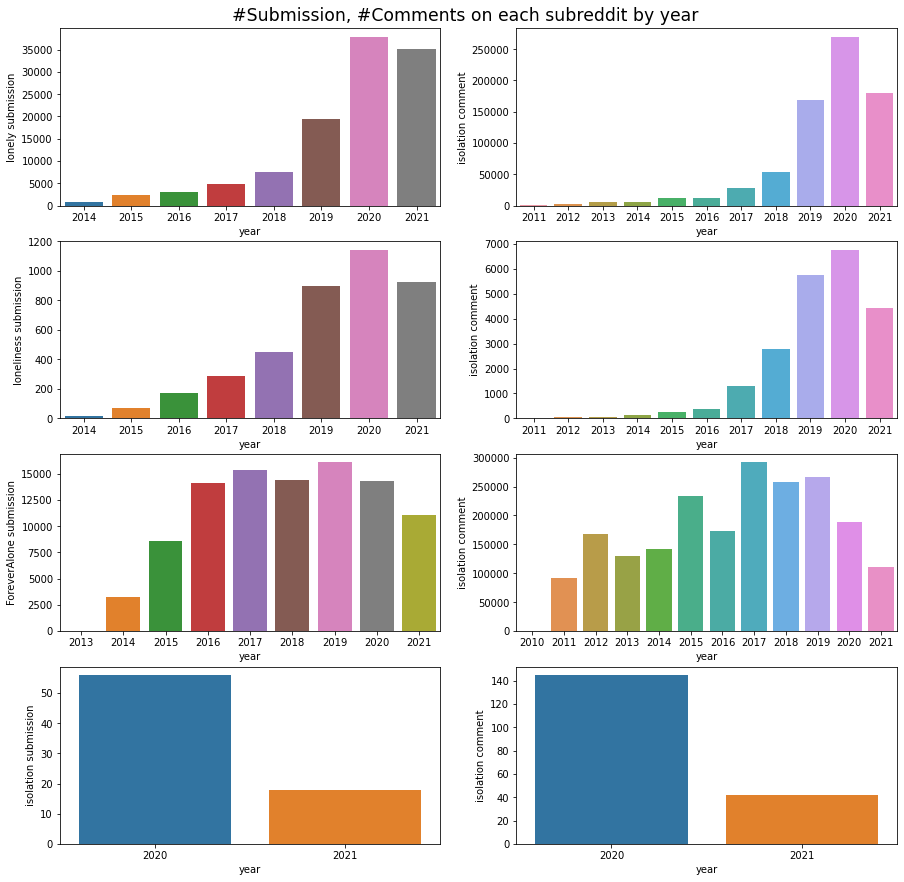

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
fig.suptitle('#Submission, #Comments on each subreddit by year',fontsize="xx-large", y=0.9)

for i, df in enumerate(sub_lst):
    year = df['date'].apply(getYear)
    p = sns.countplot(year, ax=axes[i, 0])
    p.set(ylabel=name_lst[i] + " submission", xlabel="year")

for j, df in enumerate(com_lst):
    year = df['date'].apply(getYear)
    p = sns.countplot(year, ax=axes[j, 1])
    p.set(ylabel=name_lst[i] + " comment", xlabel="year")

Text(0.5, 1.0, 'Average #comments per submission by subreddit')

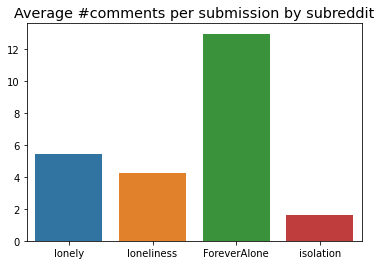

In [9]:
mean_com = []
for i,df in enumerate(sub_lst):
    mean_com.append(df['num_comments'].mean())


p = sns.barplot(x=name_lst,y=mean_com)
p.set_title("Average #comments per submission by subreddit", fontsize="x-large")

## sub, com by month

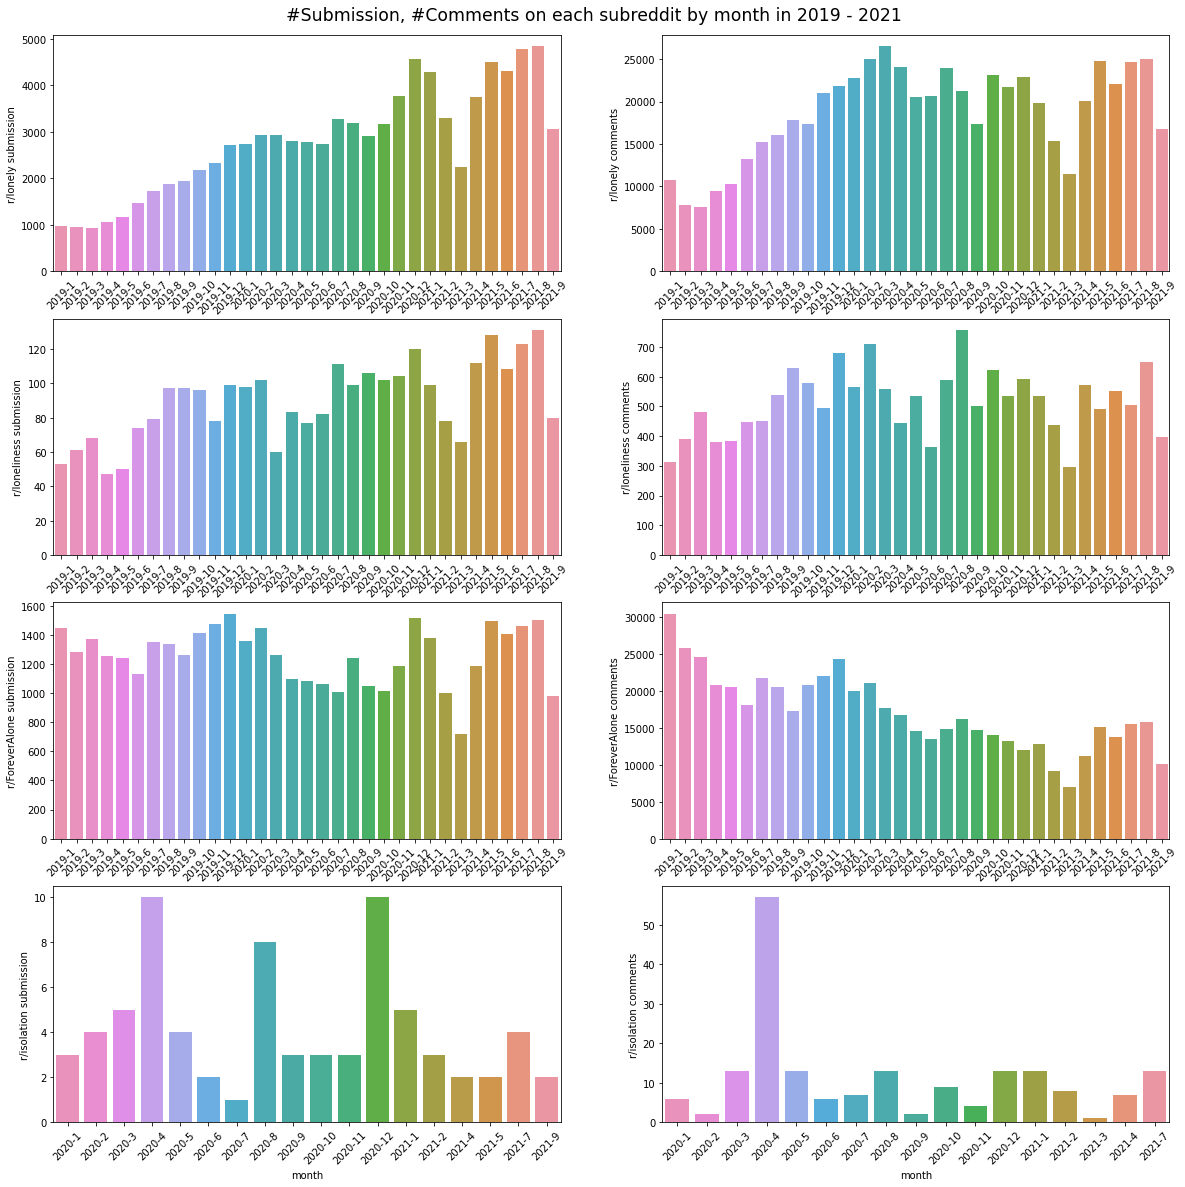

In [48]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
fig.suptitle('#Submission, #Comments on each subreddit by month in 2019 - 2021',fontsize="xx-large", y=0.9)


for i, df in enumerate(sub_lst):
    df=df[df['date'].apply(getYear) > 2018]
    mon = df['date'].apply(getMonth)
    year = df['date'].apply(getYear)
    moy = [str(m)+'-'+str(n) for m,n in zip(year,mon)]
    p = sns.countplot(moy, ax=axes[i,0])
    p.set(ylabel='r/' + name_lst[i] + " submission", xlabel="month")
    p.invert_xaxis()
    axes[i,0].tick_params(axis='x', labelrotation=45)
    
for j, df in enumerate(com_lst):
    df=df[df['date'].apply(getYear) > 2018]
    mon = df['date'].apply(getMonth)
    year = df['date'].apply(getYear)
    moy = [str(m)+'-'+str(n) for m,n in zip(year,mon)]
    p = sns.countplot(moy, ax=axes[j, 1])
    p.set(ylabel='r/' + name_lst[j] + " comments", xlabel="month")
    p.invert_xaxis()
    axes[j,1].tick_params(axis='x', labelrotation=45)


In [26]:
moy

['2021-7',
 '2021-7',
 '2021-7',
 '2021-7',
 '2021-7',
 '2021-7',
 '2021-7',
 '2021-7',
 '2021-7',
 '2021-7',
 '2021-7',
 '2021-7',
 '2021-7',
 '2021-4',
 '2021-4',
 '2021-4',
 '2021-4',
 '2021-4',
 '2021-4',
 '2021-4',
 '2021-3',
 '2021-2',
 '2021-2',
 '2021-2',
 '2021-2',
 '2021-2',
 '2021-2',
 '2021-2',
 '2021-2',
 '2021-1',
 '2021-1',
 '2021-1',
 '2021-1',
 '2021-1',
 '2021-1',
 '2021-1',
 '2021-1',
 '2021-1',
 '2021-1',
 '2021-1',
 '2021-1',
 '2021-1',
 '2020-12',
 '2020-12',
 '2020-12',
 '2020-12',
 '2020-12',
 '2020-12',
 '2020-12',
 '2020-12',
 '2020-12',
 '2020-12',
 '2020-12',
 '2020-12',
 '2020-12',
 '2020-11',
 '2020-11',
 '2020-11',
 '2020-11',
 '2020-10',
 '2020-10',
 '2020-10',
 '2020-10',
 '2020-10',
 '2020-10',
 '2020-10',
 '2020-10',
 '2020-10',
 '2020-9',
 '2020-9',
 '2020-8',
 '2020-8',
 '2020-8',
 '2020-8',
 '2020-8',
 '2020-8',
 '2020-8',
 '2020-8',
 '2020-8',
 '2020-8',
 '2020-8',
 '2020-8',
 '2020-8',
 '2020-7',
 '2020-7',
 '2020-7',
 '2020-7',
 '2020-7',
 '2020

## sub, com per user

In [ ]:
loneliness_sub_per_author = pd.DataFrame(df_loneliness_sub.groupby('author')['selftext'].count()).reset_index()
loneliness_sub_per_author.rename(columns={'id':'submission_count','selftext':'submission_count'},inplace=True)
loneliness_sub_per_author

In [ ]:
loneliness_com_per_author = pd.DataFrame(df_loneliness_com.groupby('author')['body'].count()).reset_index()
loneliness_com_per_author.rename(columns={'id':'submission_count','body':'comment_count'},inplace=True)
loneliness_com_per_author

Index(['subreddit', 'created_utc', 'id', 'link_id', 'parent_id', 'author',
       'author_fullname', 'body', 'collapsed', 'is_submitter', 'no_follow',
       'permalink', 'date'],
      dtype='object')